In [3]:
#Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
#Machine Learning algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# For splitting dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from pprint import pprint  
from sklearn.model_selection import GridSearchCV 
%matplotlib inline

In [4]:
#Load the datasets
dataset_train = pd.read_csv("price_prediction_traindataset.csv",na_values={"pickup_datetime":"43"})
dataset_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
#datatyes of Train data
dataset_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [6]:
dataset_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
# Converting fare amount from object to int
# Replacing all non-numeric with NaN Using errors=’coerce’.

dataset_train["fare_amount"] = pd.to_numeric(dataset_train["fare_amount"],errors = "coerce")

In [8]:
dataset_train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
# Removing  NA values in datetime column

dataset_train.dropna(subset=["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [10]:
# changing pickup_datetime variable to datetime

dataset_train['pickup_datetime'] =  pd.to_datetime(dataset_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [11]:
# saperating the "Pickup_datetime" column into separate fields like year,month,day of the week

dataset_train['Year'] = dataset_train['pickup_datetime'].dt.year
dataset_train['Month'] = dataset_train['pickup_datetime'].dt.month
dataset_train['Date'] = dataset_train['pickup_datetime'].dt.day
dataset_train['Day'] = dataset_train['pickup_datetime'].dt.dayofweek
dataset_train['Hour'] = dataset_train['pickup_datetime'].dt.hour
dataset_train['Minute'] = dataset_train['pickup_datetime'].dt.minute

In [12]:
dataset_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [13]:
# removing missing values in pickup_datetime

dataset_train = dataset_train.drop(dataset_train[dataset_train['pickup_datetime'].isnull()].index, axis=0)
print(dataset_train.shape)
print(dataset_train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [14]:
#Maximum passengers allowed per cab is 6 hence removing passenger count which is higher than 6 and lower than 1. 
#Removing null values in passenger_count rows

dataset_train = dataset_train.drop(dataset_train[dataset_train["passenger_count"]> 6 ].index, axis=0)
dataset_train = dataset_train.drop(dataset_train[dataset_train["passenger_count"]< 1 ].index, axis=0)
dataset_train = dataset_train.drop(dataset_train[dataset_train['passenger_count'].isnull()].index, axis=0)
print(dataset_train.shape)
print(dataset_train['passenger_count'].isnull().sum())
dataset_train["passenger_count"].describe()


(15933, 13)
0


count    15933.000000
mean         1.649677
std          1.265925
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [15]:
#Checking fare_amount with null and negative values 
dataset_train["fare_amount"].sort_values(ascending=False)
Counter(dataset_train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [16]:
#Removing Null and Zero values from fare_amount
dataset_train=dataset_train.drop(dataset_train[dataset_train['fare_amount']<1].index,axis=0)
dataset_train=dataset_train.drop(dataset_train[dataset_train["fare_amount"].isnull()].index, axis=0)
dataset_train.shape
dataset_train["fare_amount"].min()

1.14

In [17]:
dataset_train['fare_amount'].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
           ...   
6765         2.50
6703         2.50
376          2.50
14633        2.50
1427         1.14
Name: fare_amount, Length: 15904, dtype: float64

In [18]:
# Removing 54343 and 4343 which is far greater than 453 values

dataset_train=dataset_train.drop(dataset_train[dataset_train["fare_amount"]>453].index, axis=0)
dataset_train.shape

(15902, 13)

In [19]:
dataset_train['fare_amount'].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
          ...  
8596       2.50
13221      2.50
13571      2.50
8547       2.50
1427       1.14
Name: fare_amount, Length: 15902, dtype: float64

In [20]:
dataset_train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [21]:
#validating pickup_latitude and pickup_longitude
# Dropping Lattitude----> (-90 to 90), 
# Dropping rows in pickup_latitude having the value >90

dataset_train = dataset_train.drop((dataset_train[dataset_train['pickup_latitude']<-90]).index, axis=0)
dataset_train = dataset_train.drop((dataset_train[dataset_train['pickup_latitude']>90]).index, axis=0)

In [22]:
#Dropping Longitude----> (-180 to 180)
dataset_train[dataset_train['pickup_longitude']<-180]
dataset_train[dataset_train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [23]:
dataset_train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [24]:
#Loading the test datasets
dataset_test = pd.read_csv("price_prediction_testdataset.csv")
dataset_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [25]:
#Validating Test data 
dataset_test["pickup_datetime"]=pd.to_datetime(dataset_test["pickup_datetime"],format="%Y-%m-%d %H:%M:%S UTC")

# We will saperate the Pickup_datetime column into separate field like year, month, day of the week

dataset_test['Year']=dataset_test['pickup_datetime'].dt.year
dataset_test['Month']=dataset_test['pickup_datetime'].dt.month
dataset_test['Date']=dataset_test['pickup_datetime'].dt.day
dataset_test['Day']=dataset_test['pickup_datetime'].dt.dayofweek
dataset_test['Hour']=dataset_test['pickup_datetime'].dt.hour
dataset_test['Minute']=dataset_test['pickup_datetime'].dt.minute


In [26]:
# Re-checking test datatypes after conversion
dataset_test.dtypes
dataset_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

|Train_dataset and Test_dataset are now used for analysis

In [27]:
#We are using haversine formula to calculate distance between two points(pickup_latitude and pickup_longitute values)

#Importing Math
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    longitute1=a[0]
    latitude1=a[1]
    longitute2=a[2]
    latitude2=a[3]
    
    # Convert decimal degrees to radians 
    longitute1, latitude1, longitute2, latitude2 = map(radians, [longitute1, latitude1, longitute2, latitude2])

    # haversine formula 
    dlon = longitute2 - longitute1 
    dlat = latitude2 - latitude1 
    a = sin(dlat/2)**2 + cos(latitude1) * cos(latitude2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [28]:
dataset_train['distance'] = dataset_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [29]:
dataset_test['distance'] = dataset_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [30]:
dataset_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [31]:
dataset_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [32]:
dataset_train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
Year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [33]:
dataset_test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
Year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [34]:
# Finding decending order of distance to get to know whether the outliers are presented or not.
dataset_train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
13050       0.000000
11593       0.000000
2346        0.000000
8331        0.000000
1637        0.000000
Name: distance, Length: 15901, dtype: float64

OBSERVATIONS

As we can see that top 23 values in the distance variables are very high.
It means more than 8000 Kms distance they have travelled.
Just after 23rd value from the top, the distance goes down to 129, which means these values are showing some outliers.
We need to remove these values.

In [35]:
Counter(dataset_train['distance'] == 0)

Counter({False: 15447, True: 454})

In [36]:
Counter(dataset_test['distance']==0)

Counter({False: 9829, True: 85})

In [37]:
# We will remove the rows whose distance value is zero

dataset_train = dataset_train.drop(dataset_train[dataset_train['distance']== 0].index, axis=0)
dataset_train.shape

(15447, 14)

In [38]:
# We will remove the rows whose distance values is very high, which is more than 129kms.

dataset_train = dataset_train.drop(dataset_train[dataset_train['distance'] > 130 ].index, axis=0)
dataset_train.shape

(15424, 14)

In [39]:
dataset_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


OBSERVATIONS

Now, we have splitted the pickup_datetime variable into different varaibles like month, year, day etc. Now, we dont need to have that pickup_datetime variable. Hence we can drop that.

In [40]:
drop1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

dataset_train = dataset_train.drop(drop1, axis = 1)

In [41]:
dataset_train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [42]:
dataset_train['passenger_count'] = dataset_train['passenger_count'].astype('int64')
dataset_train['Year'] = dataset_train['Year'].astype('int64')
dataset_train['Month'] = dataset_train['Month'].astype('int64')
dataset_train['Date'] = dataset_train['Date'].astype('int64')
dataset_train['Day'] = dataset_train['Day'].astype('int64')
dataset_train['Hour'] = dataset_train['Hour'].astype('int64')

In [43]:
dataset_train.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [44]:
drop2 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

dataset_test = dataset_test.drop(drop2, axis = 1)
dataset_test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [45]:
dataset_test['passenger_count'] = dataset_test['passenger_count'].astype('int64')
dataset_test['Year'] = dataset_test['Year'].astype('int64')
dataset_test['Month'] = dataset_test['Month'].astype('int64')
dataset_test['Date'] = dataset_test['Date'].astype('int64')
dataset_test['Day'] = dataset_test['Day'].astype('int64')
dataset_test['Hour'] = dataset_test['Hour'].astype('int64')

In [46]:
dataset_test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

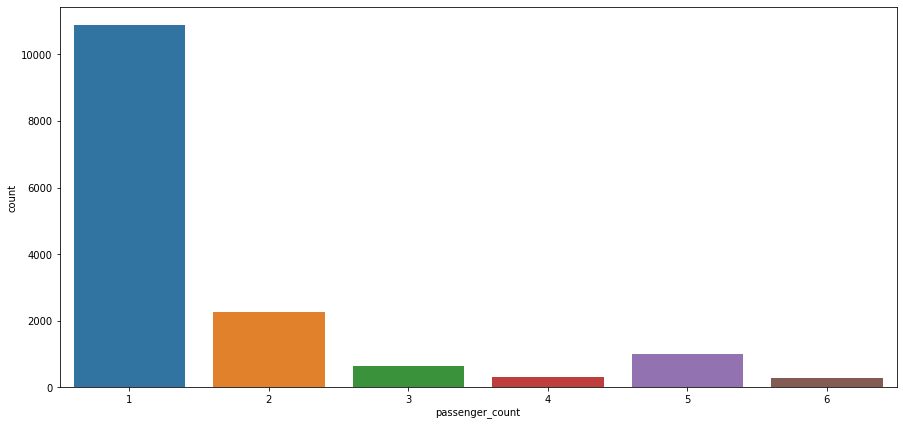

In [47]:
#DATA VISUALIZATION 

# Data Count plot on passenger count

plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=dataset_train)

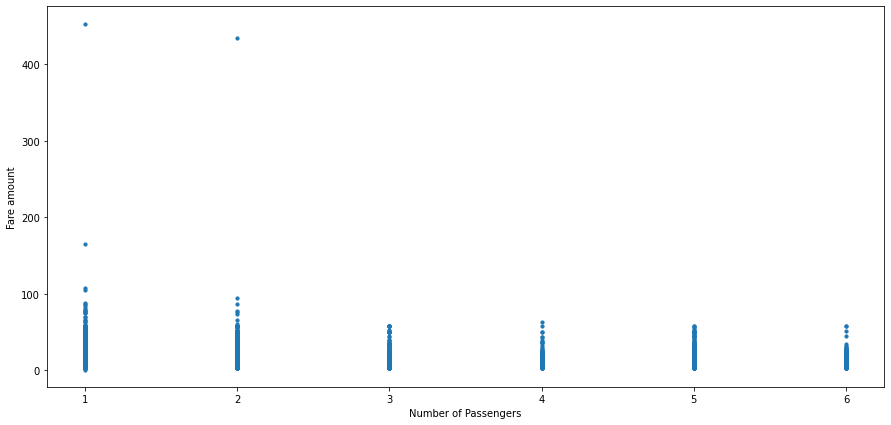

In [48]:
# Finding Relation beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=dataset_train['passenger_count'], y=dataset_train['fare_amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

OBSERVATIONS

By seeing the above plots we can easily conclude that:

* Single travelling passengers are most frequent travellers.
* At the sametime, we can also conclude that highest Fare are coming from single & double travelling passengers.

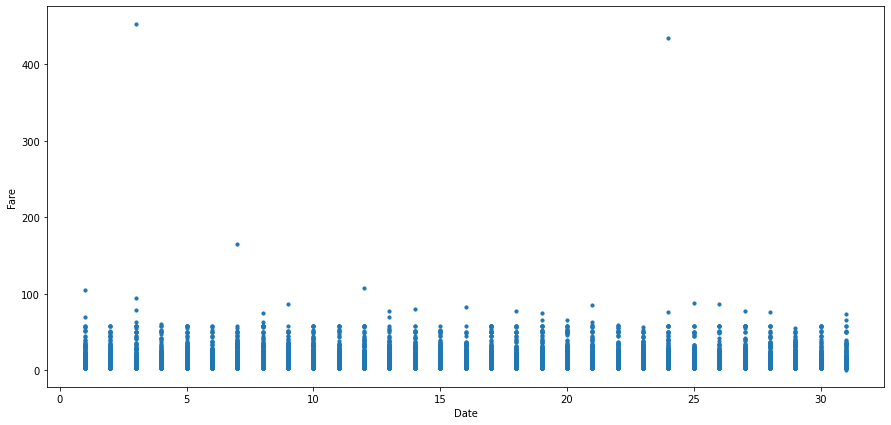

In [49]:
# Relationship between date and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=dataset_train['Date'], y=dataset_train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

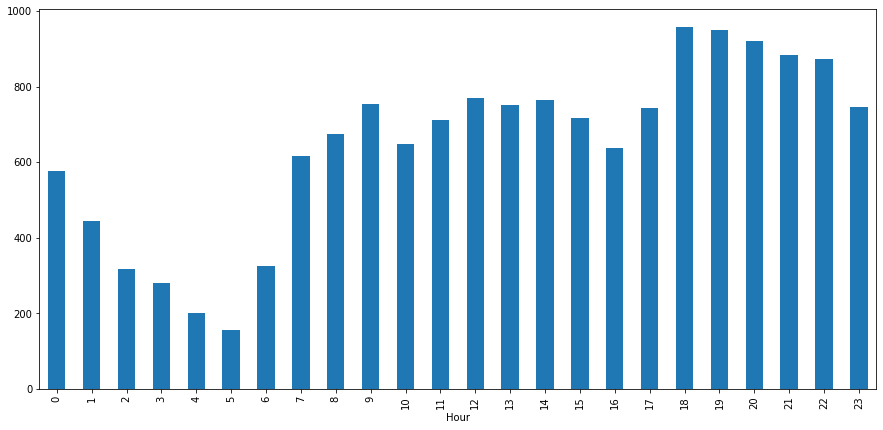

In [50]:
plt.figure(figsize=(15,7))
dataset_train.groupby(dataset_train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

OBSERVATIONS

Lowest cabs at 5 AM and highest at around 7 PM i.e the office rush hours

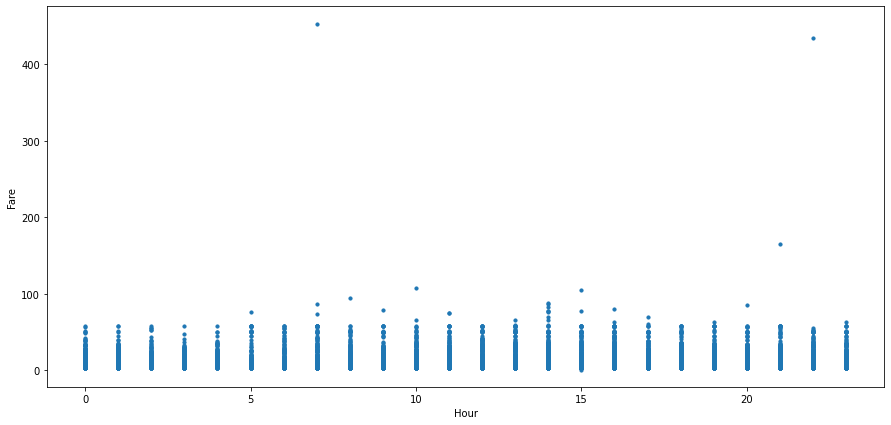

In [51]:
#Relationship between Time and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=dataset_train['Hour'], y=dataset_train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

OBSERVATIONS

From the above plot, We can observe that the cabs taken at 7 am and 23(11 Pm) are the costliest.
Hence we can assume that cabs taken early in morning and late at night are costliest

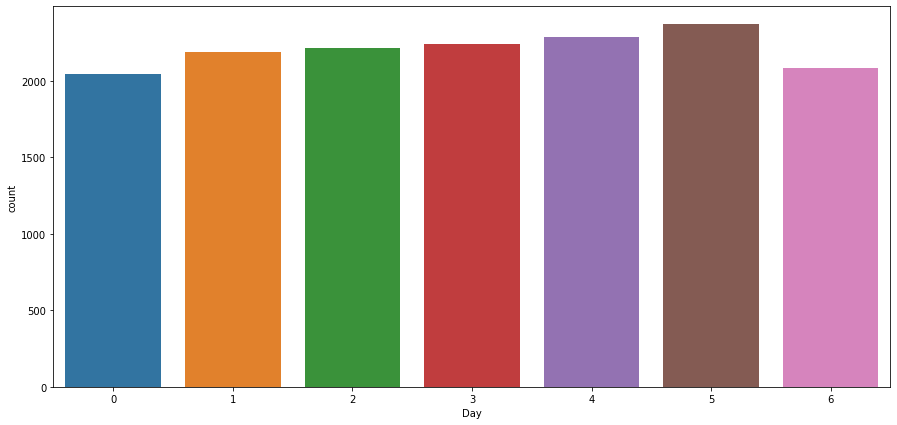

In [52]:
# Impact of Day on the number of cab rides

plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=dataset_train)

OBSERVATIONS

The day of the week does not seem to have much influence on the number of cabs ride.

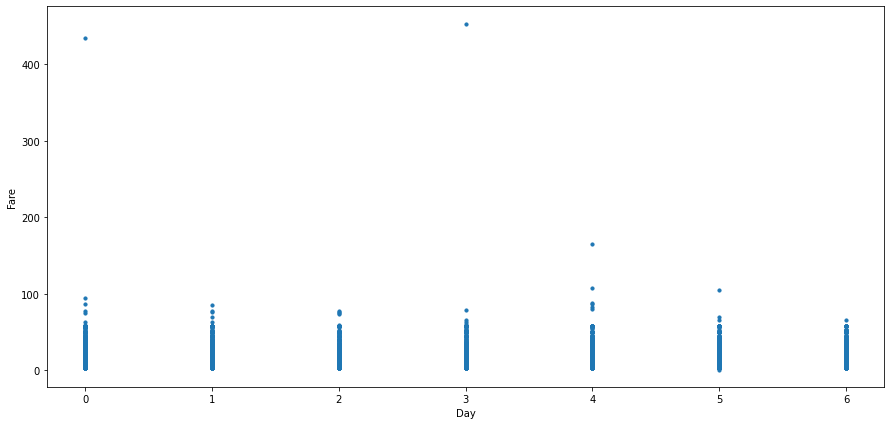

In [53]:
#Relationships between day and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=dataset_train['Day'], y=dataset_train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

OBSERVATIONS

The highest fare seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday.
May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices.

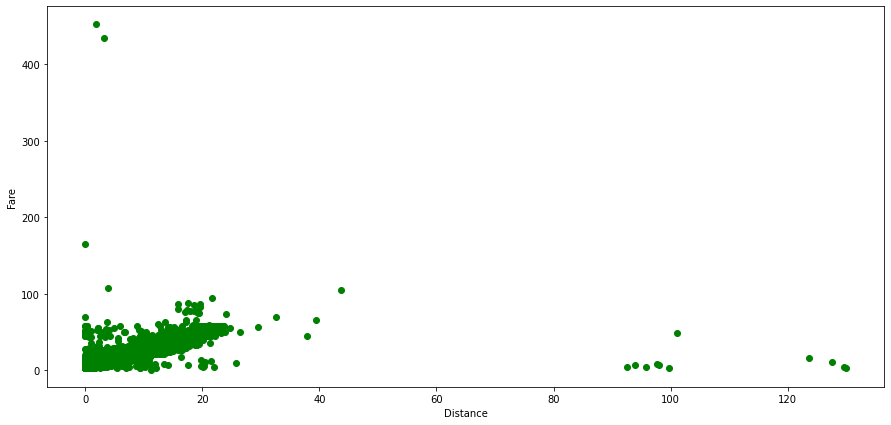

In [54]:
#Relationship between distance and fare 

plt.figure(figsize=(15,7))
plt.scatter(x = dataset_train['distance'],y = dataset_train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

OBSERVATIONS

It is quite obvious that distance will effect the amount of fare.

In [55]:
test1= dataset_test.copy()

APPLYING ML MODEL

In [56]:
# train test split for further modelling

x_train, x_test, y_train, y_test = train_test_split( dataset_train.iloc[:, dataset_train.columns != 'fare_amount'], 
                         dataset_train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [57]:
print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


DECISION TREE MODEL

In [58]:
deci_tree_model = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [59]:
# Prediction on train data

prediction_train_dt = deci_tree_model.predict(x_train)



# Prediction on test data

prediction_test_dt = deci_tree_model.predict(x_test)

In [60]:
# Calculating Mean Square Error and Mean Absolute Error for train data

mean_sqr_error_train_dt = mean_squared_error(y_train, prediction_train_dt)
mean_abs_error_train_dt = mean_absolute_error(y_train, prediction_train_dt)


# Calculating Mean Square Error and Mean Absolute Error for test data

mean_sqr_error_test_dt = mean_squared_error(y_test, prediction_test_dt)
mean_abs_error_test_dt = mean_absolute_error(y_test, prediction_test_dt)


In [61]:
print("Mean Squared Error for Train data = "+str(mean_sqr_error_train_dt))
print("Mean Absolute Error for Train data = "+str(mean_abs_error_train_dt))

print("Mean Squared Error for Test data = "+str(mean_sqr_error_test_dt))
print("Mean Absolute Error for Test data = "+str(mean_abs_error_test_dt))

Mean Squared Error for Train data = 57.78346570031228
Mean Absolute Error for Train data = 3.097110639270525
Mean Squared Error for Test data = 20.288729313175885
Mean Absolute Error for Test data = 2.8754616038553897


In [62]:
# R_square calculation for train data

r2_score(y_train, prediction_train_dt)

0.5325872525943498

In [63]:
# R_square calculation for test data

r2_score(y_test, prediction_test_dt)

0.7295437941743981

RANDOM FOREST MODEL

In [64]:
rand_fore = RandomForestRegressor(n_estimators = 300)
rand_fore.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
# Prediction on train data

prediction_train_rf = rand_fore.predict(x_train)

# Prediction on test data

prediction_test_rf = rand_fore.predict(x_test)

In [66]:
# Calculating Mean Squared Error and Mean Absolute Error for train data

mean_sq_error_train = mean_squared_error(y_train, prediction_train_rf)
mean_abs_error_train = mean_absolute_error(y_train, prediction_train_rf)

# Calculating Mean Squared Error and Absolute Squared Error for test data

mean_sq_error_test = mean_squared_error(y_test, prediction_test_rf)
mean_abs_error_test = mean_absolute_error(y_test, prediction_test_rf)


In [67]:
print("Mean Squared Error for Train data = "+str(mean_sq_error_train))
print("Mean Absolute Error for Train data = "+str(mean_abs_error_train))
print("Mean Squared Error for Test data = "+str(mean_sq_error_test))
print("Mean Absolute Error for Test data = "+str(mean_abs_error_test))

Mean Squared Error for Train data = 8.81869321053526
Mean Absolute Error for Train data = 0.8973008104384477
Mean Squared Error for Test data = 15.214967233240044
Mean Absolute Error for Test data = 2.140537493246893


In [68]:
# Calculate R_square for train data

r2_score(y_train, prediction_train_rf)

0.9286652406167191

In [69]:
# Calculate R_square for test data

r2_score(y_test, prediction_test_rf)

0.7971789042998069

LINEAR REGRESSION MODEL

In [70]:
# Building model on top of training dataset

model = LinearRegression().fit(x_train , y_train)

In [71]:
# Prediction on train data

pred_train_LR = model.predict(x_train)

In [72]:
# Prediction on test data

pred_test_LR= model.predict(x_test)

In [73]:
# RMSE for train data

RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [74]:
# RMSE for test data

RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [75]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))

Root Mean Squared Error for Train data = 8.99100049041213
Root Mean Squared Error for Test data = 5.332146690728364


In [76]:
# Calculate R_square for train data

from sklearn.metrics import r2_score

r2_score(y_train, pred_train_LR)

0.34609748309146127

In [77]:
r2_score(y_test, pred_test_LR)

0.6209938297138393

GRADIENT BOOSTING

In [78]:
GB_MODEL = GradientBoostingRegressor().fit(x_train, y_train)

In [79]:
# Prediction on train data

pred_train_GB = GB_MODEL.predict(x_train)
# Prediction on test data
pred_test_GB = GB_MODEL.predict(x_test)

In [80]:
# RMSE for train data

RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
# RMSE for test data

RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [81]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_GB))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_GB))

Root Mean Squared Error for Train data = 5.885370347600377
Root Mean Squared Error for Test data = 3.6556026013856964


In [82]:
# Calculate R_square for train data

r2_score(y_train, pred_train_GB)

0.7198152072614652

In [83]:
# Calculate R_square for test data

r2_score(y_test, pred_test_GB)

0.8218605699056015

OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [85]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV


# Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [86]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_rf = randomcv_rf.fit(x_train,y_train)
prediction_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(x_test)

In [87]:
# R_square

RRF_r2 = r2_score(y_test, predictions_RRF)

In [88]:
# Calculating RMSE

RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

In [89]:
print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.73.
RMSE =  4.469299222774914


In [90]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [91]:
# Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [92]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_gb = randomcv_gb.fit(x_train,y_train)
predictions_gb = randomcv_gb.predict(x_test)


view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(x_test)

In [93]:
# R_square

gb_r2 = r2_score(y_test, predictions_gb)


# Calculating RMSE

gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

In [94]:
print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.78.
RMSE =  4.069712487003473


In [95]:
from sklearn.model_selection import GridSearchCV  

# Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [96]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [97]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [98]:
#Apply model on test data

predictions_GRF = gridcv_rf.predict(x_test)

In [99]:
# R_square

GRF_r2 = r2_score(y_test, predictions_GRF)

In [100]:
# Calculating RMSE

GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [101]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 12}
R-squared = 0.8.
RMSE =  3.8294149900194943


In [102]:
# Grid Search CV for gradinet boosting

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [103]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [104]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)

gridcv_gb = gridcv_gb.fit(x_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

In [105]:
# Apply model on test data

predictions_Ggb = gridcv_gb.predict(x_test)

In [106]:
# R_square

Ggb_r2 = r2_score(y_test, predictions_Ggb)

In [107]:
# Calculating RMSE

Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

In [108]:
print('Grid Search CV Gradient Boosting regression Model Performance:')

print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.81.
RMSE =  3.7449268310103383


FARE PREDICTION (from cleaned and processed test dataset)

We already have cleaned and processed test and training dataset.
Hence, we will be predicting using grid search CV for Random Forest Model.

---



In [109]:
# Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [110]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [111]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [112]:
dataset_test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [113]:
#Apply model on test data

predictions_GRF_test = gridcv_rf.predict(dataset_test)

predictions_GRF_test

array([ 8.96532204,  9.20613259,  5.4861336 , ..., 52.92558951,
       25.75879193,  5.82456515])

In [114]:
dataset_test['Predicted_fare'] = predictions_GRF_test

In [115]:
dataset_test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,2.323259,8.965322
1,1,2015,1,27,1,13,2.425353,9.206133
2,1,2011,10,8,5,11,0.618628,5.486134
3,1,2012,12,1,5,21,1.961033,9.180767
4,1,2012,12,1,5,21,5.387301,14.064193
